In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
plt.style.use('ggplot')

## Load Dataset

In [2]:
# load train data
train_path = "Genre Classification Dataset/train_data.txt"
train_data = pd.read_csv(train_path, sep = ':::', names = ['Title','Genre','Description'], engine = 'python')

In [3]:
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [5]:
# check missing data
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [6]:
# check duplicates
train_data.duplicated().sum()

0

In [7]:
# load test data
test_path = "Genre Classification Dataset/test_data.txt"
test_data = pd.read_csv(test_path, sep = ':::', names = ['Title','Description'], engine = 'python')

## Visualization

Text(0.5, 1.0, 'Genre Distribution')

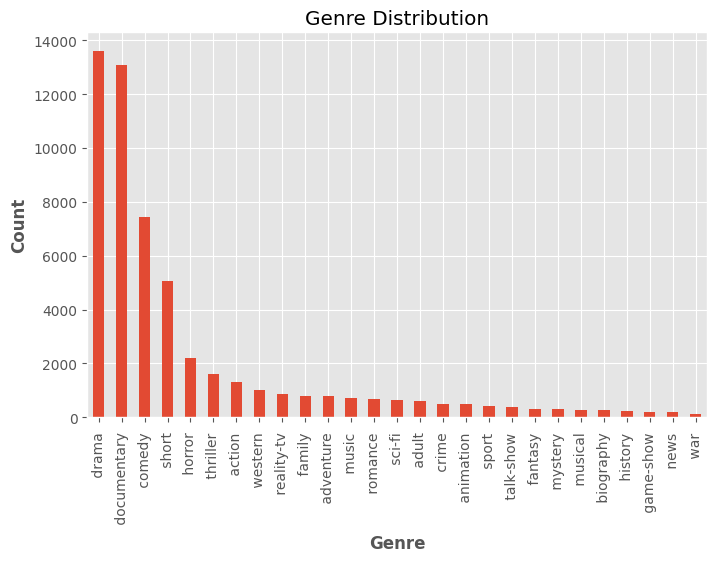

In [8]:
ax = train_data['Genre'].value_counts().plot(kind = 'bar', figsize = (8,5))
ax.set_xlabel('Genre',fontweight = 'bold')
ax.set_ylabel('Count', fontweight = 'bold')
plt.title('Genre Distribution')

## Data Preprocessing & Cleaning

In [9]:
example = train_data['Description'].values[0]
example

' Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.'

In [10]:
import spacy
nlp = spacy.load("en_core_web_md")

In [11]:
def text_clean(text):
    text = text.lower()
    words = nlp(text)
    
    tokens = []
    for token in words:
        if not token.is_stop:
            tokens.append(token.lemma_)
    text = " ".join([str(token) for token in tokens if len(token) > 2])
    return text

In [12]:
print(text_clean(example))

listen conversation doctor parent year old oscar learn courage tell week live furious refuse speak straight talk rise lady pink meet hospital stair christmas approach rise use fantastical experience professional wrestler imagination wit charm allow oscar live life love company friend pop corn einstein bacon childhood sweetheart peggy blue


In [13]:
train_data['Description'] = train_data['Description'].apply(text_clean)

In [14]:
test_data['Description'] = test_data['Description'].apply(text_clean)

## Text Vectorization

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(train_data['Description'])
Y_test = tfidf.transform(test_data['Description'])

## Split and Train a Model (SVM)

In [16]:
X = X_train
y = train_data['Genre']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=10)

In [17]:
from sklearn.svm import LinearSVC

classifier = LinearSVC(class_weight='balanced')
classifier.fit(X_train, y_train)
y_pred_class = classifier.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred_class))

Accuracy:  0.5380429770358757


## Prediction

In [19]:
X_test_prediction = classifier.predict(Y_test)
test_data['Predicted Genre'] = X_test_prediction
test_data.head()

,Title,Description,Predicted Genre
1,Edgar's Lunch (1998),l.r brane love life car apartment job especial...,short
2,La guerra de papá (1977),spain march 1964 quico naughty child belong we...,drama
3,Off the Beaten Track (2010),year life albin family shepherd north transylv...,documentary
4,Meu Amigo Hindu (2015),father die speak brother year cancer diego tal...,drama
5,Er nu zhai (1955),know internationally martial art superstar bru...,drama


In [20]:
test_data.to_csv('Genre Predicted.csv', index = False)